<a href="https://colab.research.google.com/github/LoriSchuan-dev/feature_engineering_project2021/blob/main/mediapipe_yoga_detection_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install mediapipe

In [1]:
import mediapipe as mp
from urllib import request
import os

In [2]:
#Test Images
url_list = [#'https://i0.wp.com/cdn-prod.medicalnewstoday.com/content/images/articles/327/327086/a-woman-doing-the-bow-yoga-pose.jpg',
            #'https://i0.wp.com/www.yogabasics.com/yogabasics2017/wp-content/uploads/2013/11/bow-pose-024.jpg',
            #'https://cdn.prod.openfit.com/uploads/2019/05/13173628/bow-pose-dhanurasana-brent-laffoon-yoga521.jpg',
            # 'https://cdn-prod.medicalnewstoday.com/content/images/articles/327/327086/supine-spinal-twist-yoga-pose.jpg',
            #'https://www.artofliving.org/sites/www.artofliving.org/files/styles/original_image/public/wysiwyg_imageupload/1-Ten%20Challenging%20Yoga%20Asanas.jpg.webp?itok=OJgnpb3T',
            #'https://www.artofliving.org/sites/www.artofliving.org/files/styles/original_image/public/wysiwyg_imageupload/2-Ten%20Challenging%20Yoga%20Asanas.jpg.webp?itok=z8l14C8v',
            #'https://www.healthshots.com/wp-content/uploads/2020/09/Malasana-lead.jpg'
            'https://www.yogajournal.com/wp-content/uploads/2020/12/ccd03542-1.jpg'
            ]
            
for idx in range(len(url_list)):
    os.system("curl " + url_list[idx] + " > test_"+str(idx+1)+".jpg")

image_list = ['test_'+str(i+1)+'.jpg' for i in range(len(url_list))]

In [4]:
import cv2
# from google.colab.patches import cv2_imshow
import math
import numpy as np

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480

def resize_and_show(image):
    h, w = image.shape[:2]
    if h < w:
        img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
    else:
        img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
    
    #cv2_imshow(img)
    cv2.imshow("img", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


# Read images with OpenCV.
images = {name: cv2.imread(name) for name in image_list}
# Preview the images.
for name, image in images.items():
    print(name)   
    resize_and_show(image)

test_1.jpg


In [5]:
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles

# help(mp_pose.Pose)

In [8]:
# Run MediaPipe Pose and draw pose landmarks.
with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.2, model_complexity=2) as pose: 
    #You can change parameters mdc =>(0~1) model_complexity => 0,1,2
    #default mdc = 0.5 mc = 2
    for name, image in images.items():
        # Convert the BGR image to RGB and process it with MediaPipe Pose.
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
      # Print nose landmark.
        image_hight, image_width, _ = image.shape
        if not results.pose_landmarks:
            continue
        print(
            f'Nose coordinates: ('
            f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
            f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_hight})'
        )

        # Draw pose landmarks.
        print(f'Pose landmarks of {name}:')
        annotated_image = image.copy()
        mp_drawing.draw_landmarks(
            annotated_image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
        resize_and_show(annotated_image)

Nose coordinates: (955.3149938583374, 128.96952778100967)
Pose landmarks of test_1.jpg:


Nose world landmark:
x: -0.03469572588801384
y: -0.6034910678863525
z: -0.20691804587841034
visibility: 0.999894380569458



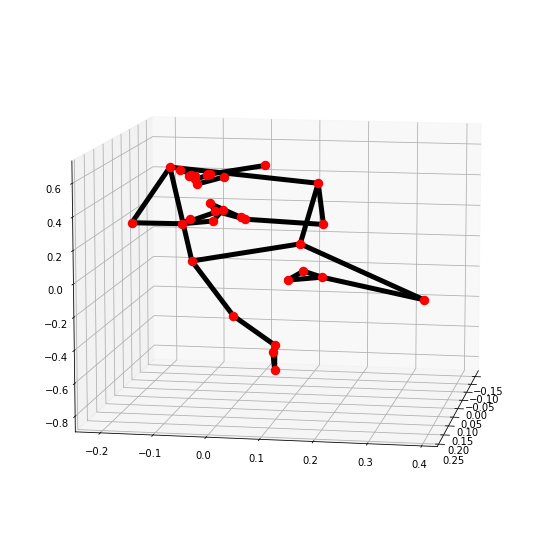

frozenset({(15, 21), (16, 20), (18, 20), (3, 7), (14, 16), (23, 25), (28, 30), (11, 23), (27, 31), (6, 8), (15, 17), (24, 26), (16, 22), (4, 5), (5, 6), (29, 31), (12, 24), (23, 24), (0, 1), (9, 10), (1, 2), (0, 4), (11, 13), (30, 32), (28, 32), (15, 19), (16, 18), (25, 27), (26, 28), (12, 14), (17, 19), (2, 3), (11, 12), (27, 29), (13, 15)})
x: -0.03469572588801384
y: -0.6034910678863525
z: -0.20691804587841034
visibility: 0.999894380569458



In [25]:
# Run MediaPipe Pose and plot 3d pose world landmarks.

with mp_pose.Pose(static_image_mode=True,
                  min_detection_confidence=0.5,
                  model_complexity=2) as pose:
    
    for name, image in images.items():
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        # Print the real-world 3D coordinates of nose in meters with the origin at
        # the center between hips.
        print('Nose world landmark:'),
        print(results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.NOSE])

            # Plot pose world landmarks.
        #fig, ax = 
        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
        print(mp_pose.POSE_CONNECTIONS)
        print(results.pose_world_landmarks.landmark[0])

In [26]:
from matplotlib import animation
from IPython.display import HTML
from mpl_toolkits.mplot3d import axes3d

def animate(i):
    ax.view_init(elev=0., azim=3.6*i)
    return fig,

# Animate
ani = animation.FuncAnimation(fig, animate, frames=100, interval=100, blit=True)    

HTML(ani.to_html5_video())

AttributeError: 'NoneType' object has no attribute 'canvas'